# Computational Workflows for biomedical data

Welcome to the course Computational Workflows for Biomedical Data. Over the next two weeks, you will learn how to leverage nf-core pipelines to analyze biomedical data and gain hands-on experience in creating your own pipelines, with a strong emphasis on Nextflow and nf-core.

Course Structure:

- Week 1: You will use a variety of nf-core pipelines to analyze a publicly available biomedical study.
- Week 2: We will shift focus to learning the basics of Nextflow, enabling you to design and implement your own computational workflows.<br>
- Final Project: The last couple of days, you will apply your knowledge to create a custom pipeline for analyzing biomedical data using Nextflow and the nf-core template.

## Basics

If you have not installed all required software, please do so now asap!


If you already installed all software, please go on and start answering the questions in this notebook. If you have any questions, don't hesitate to approach us.

1. What is nf-core?

nf-core is a community-driven project that develops a curated set of high-quality analysis pipelines built using Nextflow. It provides standardized, peer-reviewed, and best-practice workflows for data analysis in fields like genomics, transcriptomics, and proteomics. The project is open-source and relies on collaboration across research groups worldwide, making complex bioinformatics analyses easier to reproduce, share, and scale across different computing environments

2. How many pipelines are there currently in nf-core?

139


3. Are there any non-bioinformatic pipelines in nf-core?

yes, for example nf-core/spinningjenny

4. Let's go back a couple of steps. What is a pipeline and what do we use it for?

A pipeline is an automated sequence of data-processing steps, where the output of one step becomes the input for the next. In bioinformatics, pipelines are widely used to handle complex analyses such as processing raw sequencing data, running quality checks, aligning reads to a reference genome, and identifying genetic variants. They streamline these multi-step workflows, making them faster, more reproducible, and less error-prone, while ensuring standardized best practices and scalability across different computing environments.

5. Why do you think nf-core adheres to strict guidelines?

nf-core follows strict guidelines to ensure its pipelines are reliable, reproducible, and consistent, making them easier to use, maintain, and share while giving researchers confidence in their results.

6. What are the main features of nf-core pipelines?

Reproducible, portable, standardized, community-driven and scalable.

## Let's start using the pipelines

1. Find the nf-core pipeline used to measure differential abundance of genes


nf-core/differentialabundance


https://nf-co.re/differentialabundance/1.5.0/

In [ ]:
# run the pipeline in a cell 
# to run bash in jupyter notebooks, simply use ! before the command
# e.g.

!pwd



# For the tasks in the first week, please use the command line to run your commands and simply paste the commands you used in the respective cells!
#https://nf-co.re/differentialabundance/1.5.0/docs/usage/

In [ ]:
# run the pipeline in the test profile using docker containers
# make sure to specify the version you want to use (use the latest one)

!nextflow run nf-core/differentialabundance -r 1.5.0 -profile test,docker --outdir results_da

In [ ]:
# repeat the run. What did change?
!nextflow run nf-core/differentialabundance -r 1.5.0 -profile test,docker --outdir results_da

# What changed: The pipeline executed much faster because Nextflow cached the previous results

In [ ]:
# now set -resume to the command. What did change?
!nextflow run nf-core/differentialabundance -r 1.5.0 -profile test,docker --outdir results_da -resume

# It cached the previous results and continued from where it stopped

Check out the current directory. Next to the outdir you specified, what else has changed?

- A `work/` directory was created containing all intermediate files and cached results
- A `.nextflow/` directory for Nextflow metadata
- A `.nextflow.log` file with execution logs
- Timeline and report HTML files (if enabled in the configuration)

In [ ]:
# delete the work directory and run the pipeline again using -resume. What did change?
!rm -rf work
!nextflow run nf-core/differentialabundance -r 1.5.0 -profile test,docker --outdir results_da -resume

Since the work directory was deleted, the -resume flag couldn't find any cached results, so the pipeline had to run all processes from the beginning again. The execution time was similar to the first run because no intermediate files could be reused.

## Lets look at the results

### What is differential abundance analysis?

Differential abundance analysis is a method used to identify features, such as genes, proteins, or microbial species, that show significant differences in abundance between two or more conditions or groups. In bioinformatics, it is commonly applied to RNA-seq or gene expression data to find genes whose expression levels change between conditions, or to microbiome data to detect species with varying populations. This analysis helps researchers uncover biologically or clinically relevant changes and understand how different conditions influence molecular or microbial profiles.

Give the most important plots from the report:

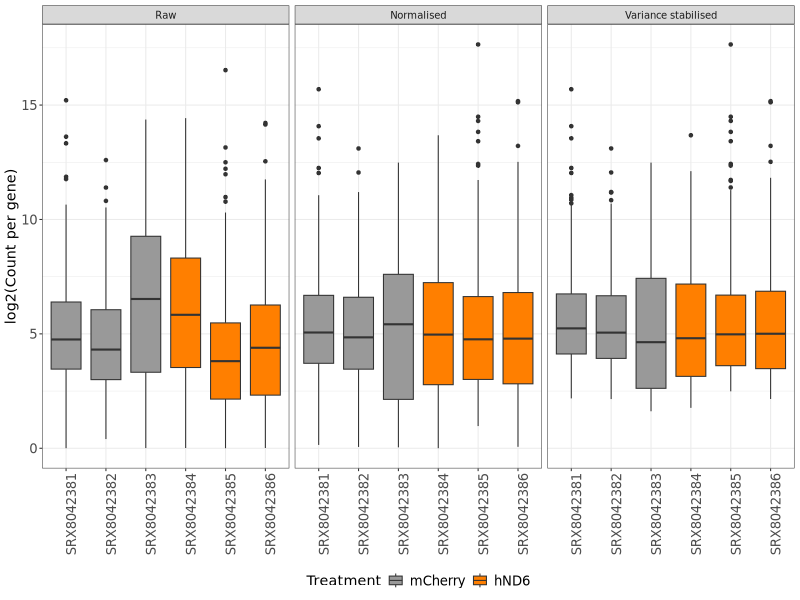

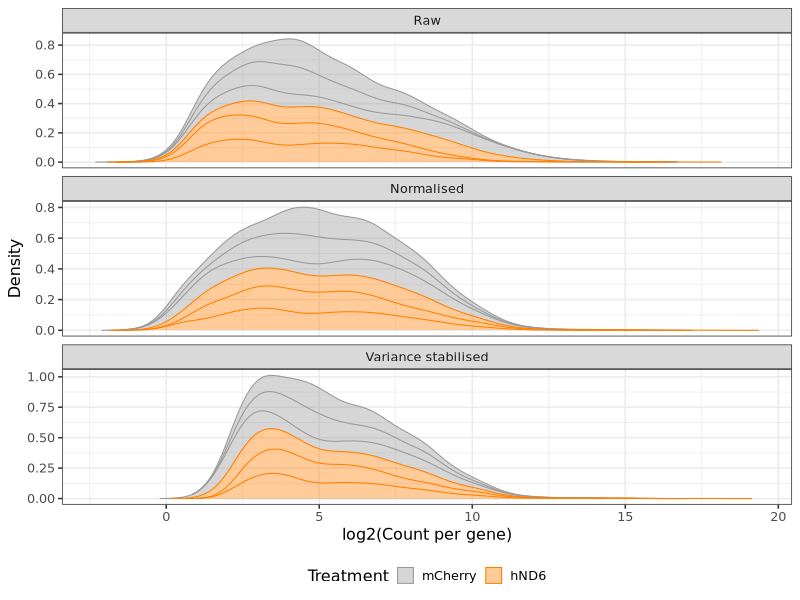

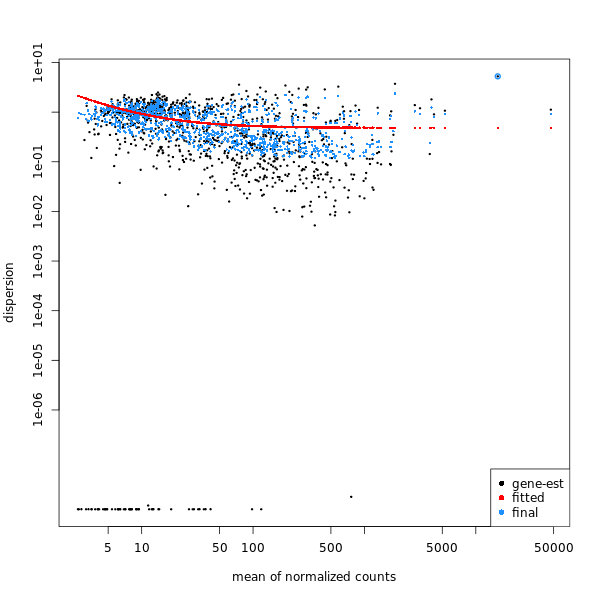

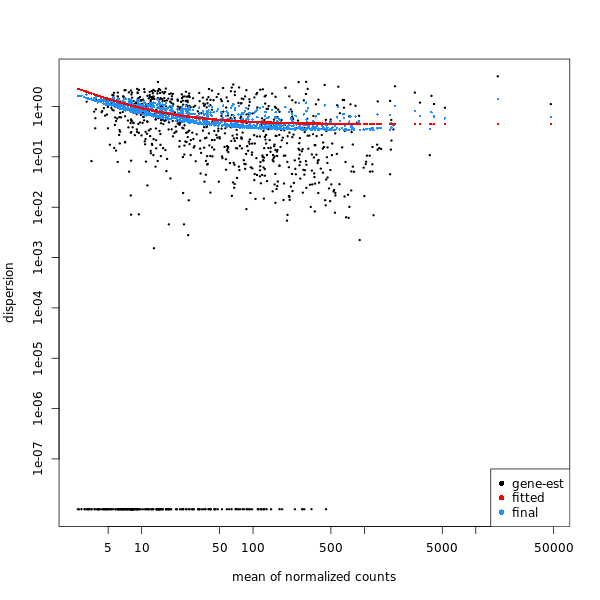

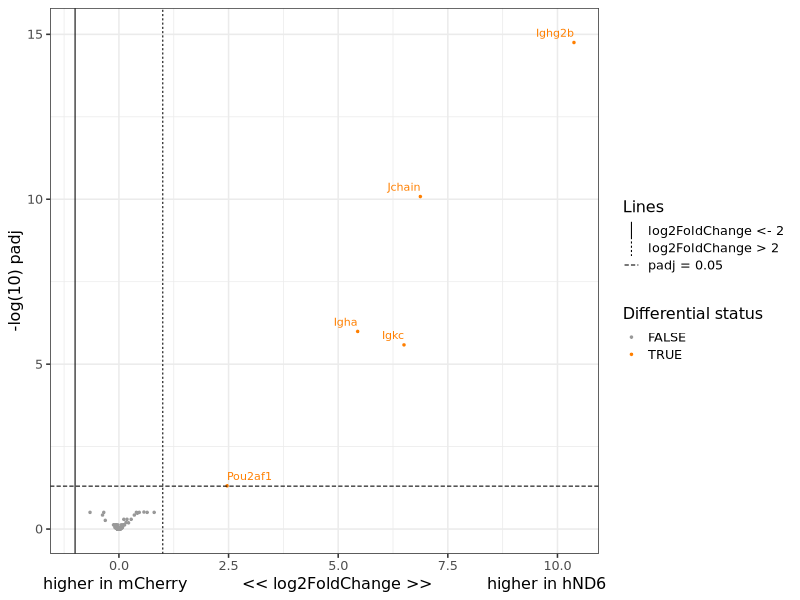